<a href="https://colab.research.google.com/github/vijay-93/E-commerce-customer-segmentation/blob/main/E_commerce_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-commerce customer segmentation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('data.csv',encoding='ISO-8859-1')
df['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 541909, dtype: object

# Removing Duplicate Value

In [ ]:
dforginal=df.copy()
df.drop_duplicates('Description')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
535327,581204,85104,????damages????,-355,12/7/2011 18:32,0.00,NaN,United Kingdom
535329,581206,21693,mixed up,-87,12/7/2011 18:34,0.00,NaN,United Kingdom
535335,581212,22578,lost,-1050,12/7/2011 18:38,0.00,NaN,United Kingdom
537621,581334,85123A,CREAM HANGING HEART T-LIGHT HOLDER,4,12/8/2011 12:07,2.95,17841.0,United Kingdom


In [ ]:
df=df.drop_duplicates('Description')
df.shape

(4224, 8)

# Pre-processing the data

1)Remove Punctuation 
2)Replace short words 
3)Making text lower case 
4)Remove stopwords 
5)Lemmatization

In [ ]:
#Removing the punctuatio
df['Description']=df['Description'].str.replace("[^a-zA-Z0-9]", " ") # when the word is not a-z,A-Z,0-9 replace with Space mark 
df = df[['Description']] #Re ordering columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df['Description']# Removed all puctuations 

0          WHITE HANGING HEART T LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART 
                         ...                 
535327                            damages    
535329                               mixed up
535335                                   lost
537621     CREAM HANGING HEART T LIGHT HOLDER
540421            PAPER CRAFT   LITTLE BIRDIE
Name: Description, Length: 4224, dtype: object

In [ ]:
df['Description']=df['Description'].fillna(" ") # filling 

In [ ]:
df['Description'] = df['Description'].apply(lambda x: ' '.join([word for word in x.split() if len(word)>2]))

In [ ]:
df['Description']

0            WHITE HANGING HEART LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4               RED WOOLLY HOTTIE WHITE HEART
                         ...                 
535327                                damages
535329                                  mixed
535335                                   lost
537621       CREAM HANGING HEART LIGHT HOLDER
540421              PAPER CRAFT LITTLE BIRDIE
Name: Description, Length: 4224, dtype: object

In [ ]:
# make entire text lowercase
df['Description'] = [review.lower() for review in df['Description']]

In [ ]:
df['Description']# all chnages to lower case 

0            white hanging heart light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4               red woolly hottie white heart
                         ...                 
535327                                damages
535329                                  mixed
535335                                   lost
537621       cream hanging heart light holder
540421              paper craft little birdie
Name: Description, Length: 4224, dtype: object

# Remove Stop Words

In [ ]:
# REMOVING STOP WORD 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = stopwords.words('english')

# Function to remove stop words 
def remove_stopwords(rev):
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([word for word in review_tokenized  if word not in stop_words])
    return rev_new
  
# removed stop word
df['Description']= [remove_stopwords(r) for r in df['Description']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['Description'] # AFTER REMOVING STOP WORD 

0            white hanging heart light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4               red woolly hottie white heart
                         ...                 
535327                                damages
535329                                  mixed
535335                                   lost
537621       cream hanging heart light holder
540421              paper craft little birdie
Name: Description, Length: 4224, dtype: object

#Lemmatization

What is Lemmatization ?

Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word

Example : better : good

In [ ]:
# Begin Lemmatization 
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger') # Run atleast once 

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['Description'] = df['Description'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
df['Description'] # After Lemmatization

0            white hang heart light holder
1                      white metal lantern
2            cream cupid heart coat hanger
3         knit union flag hot water bottle
4            red woolly hottie white heart
                        ...               
535327                              damage
535329                               mixed
535335                                lose
537621       cream hang heart light holder
540421           paper craft little birdie
Name: Description, Length: 4224, dtype: object

# Bag of Words Model

In [ ]:
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf = TfidfVectorizer(max_features=4224)
df = tfidf.fit_transform(df.Description).toarray()
featureNames = tfidf.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#Kmeans Clustering 

K means is one of the most popular Unsupervised Machine Learning Algorithms Used for Solving Classification Problems. K Means segregates the unlabeled data into various groups, called clusters, based on having similar features, common patterns.

In [ ]:
from sklearn.cluster import KMeans

inertias = []
list_k = list(range(1,20))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df)
    inertias.append(km.inertia_)

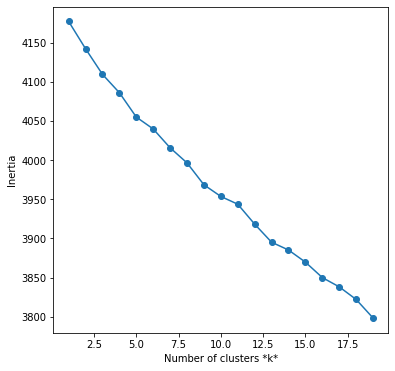

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia');

In [ ]:
df=pd.read_csv('data.csv',encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
One_hod_encoding = pd.get_dummies(df, columns=["Description"])
One_hod_encoding

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_ 4 PURPLE FLOCK DINNER CANDLES,Description_ 50'S CHRISTMAS GIFT BAG LARGE,Description_ DOLLY GIRL BEAKER,...,Description_wrongly coded 20713,Description_wrongly coded 23343,Description_wrongly coded-23343,Description_wrongly marked,Description_wrongly marked 23343,Description_wrongly marked carton 22804,Description_wrongly marked. 23343 in box,Description_wrongly sold (22719) barcode,Description_wrongly sold as sets,Description_wrongly sold sets
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2 = df.groupby('CustomerID').sum()
print(df2)# I have doen Groupby and Sum all with customer ID 

            Quantity  UnitPrice
CustomerID                     
12346.0            0       2.08
12347.0         2458     481.21
12348.0         2341     178.71
12349.0          631     605.10
12350.0          197      65.30
...              ...        ...
18280.0           45      47.65
18281.0           54      39.36
18282.0           98      62.68
18283.0         1397    1220.93
18287.0         1586     104.55

[4372 rows x 2 columns]


In [ ]:
inertias = []
list_k = list(range(1,30))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df2)
    inertias.append(km.inertia_)

In [ ]:
df2

,Quantity,UnitPrice
CustomerID,,
12346.0,0,2.08
12347.0,2458,481.21
12348.0,2341,178.71
12349.0,631,605.10
12350.0,197,65.30
...,...,...
18280.0,45,47.65
18281.0,54,39.36
18282.0,98,62.68


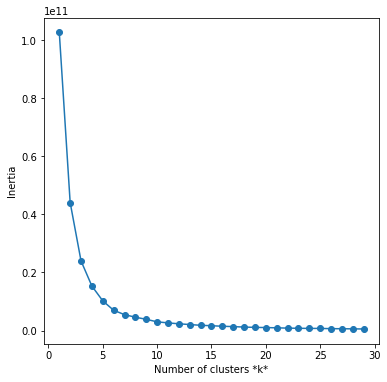

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia');